Perceptrons

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)] #petal length, petal width
y = (iris.target==0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=1000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [2]:
y_pred = per_clf.predict([[2,0.5]])
y_pred

array([1])

In [ ]:
a = -per_clf.coef_[0][0]/per_clf.coef_[0][1]
b = -per_clf.intercept_/per_clf.coef_[0][1]

axes = [0,5,0,2]

x0, x1 = np.meshgrid(np.linspace(axes[0],axes[1],500).reshape(-1,1),
                    np.linspace(axes[2],axes[3],200).reshape(-1,1),
                    )
X_new = np.c_[x0.ravel(),x1.ravel()]
y_predict = per_clf.predict(X_new)

# Building an image classifier

In [2]:
import tensorflow as tf
from tensorflow import keras

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

X_train_full.shape

(60000, 28, 28)

Split the full training set into a validation set and a smaller training set. Set the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [4]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

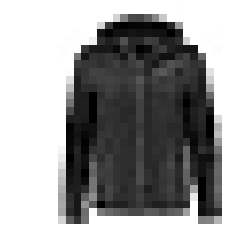

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()

In [7]:
y_train.shape

(55000,)

In [8]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_names[y_train[0]]

'Coat'

In [9]:
X_valid.shape

(5000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

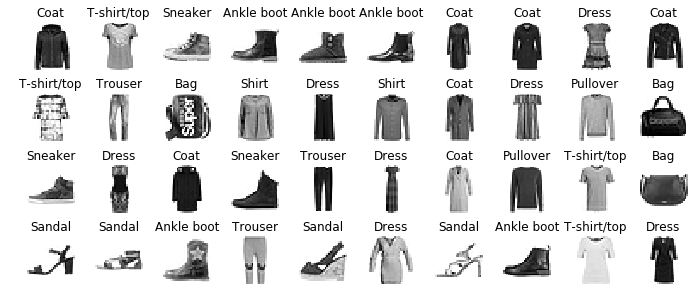

In [14]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#plt.save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [18]:
import numpy as np
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
keras.backend.clear_session()

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

AttributeError: module 'tensorflow' has no attribute 'random'

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.layers

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
keras.utils.plot_model(model,"my_mnist_model.png",show_shapes=True)
plt.show()

In [30]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [31]:
weight, biases = hidden1.get_weights()

In [32]:
weight

array([[-0.06295734, -0.00170238, -0.01272523, ..., -0.03431533,
        -0.02492237, -0.02296131],
       [-0.03036735, -0.05287793, -0.02394802, ..., -0.03840808,
        -0.03888303, -0.00834142],
       [ 0.01688225, -0.03810513, -0.05890259, ...,  0.02081934,
        -0.02673462, -0.06295963],
       ...,
       [-0.02149645,  0.02020964,  0.02187219, ..., -0.06921083,
         0.07259762, -0.03216547],
       [ 0.07287851, -0.06412113,  0.01856981, ..., -0.00133116,
        -0.04251927,  0.06607027],
       [-0.04188792,  0.00987276,  0.00350347, ..., -0.02865141,
         0.01314724,  0.03375623]], dtype=float32)

In [34]:
weight.shape

(784, 300)

In [35]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [14]:
history = model.fit(X_train,y_train, epochs=30, validation_split=0.2)

Train on 44000 samples, validate on 11000 samples
Epoch 1/30
44000/44000 [==============================] - 4s 92us/step - loss: 0.2535 - acc: 0.9084 - val_loss: 0.2602 - val_acc: 0.9047
Epoch 2/30
44000/44000 [==============================] - 4s 91us/step - loss: 0.2486 - acc: 0.9110 - val_loss: 0.2691 - val_acc: 0.9014
Epoch 3/30
44000/44000 [==============================] - 4s 101us/step - loss: 0.2436 - acc: 0.9124 - val_loss: 0.2730 - val_acc: 0.8986
Epoch 4/30
44000/44000 [==============================] - 4s 101us/step - loss: 0.2403 - acc: 0.9132 - val_loss: 0.2661 - val_acc: 0.9022
Epoch 5/30
44000/44000 [==============================] - 5s 105us/step - loss: 0.2366 - acc: 0.9146 - val_loss: 0.2656 - val_acc: 0.9057
Epoch 6/30
44000/44000 [==============================] - 4s 89us/step - loss: 0.2320 - acc: 0.9179 - val_loss: 0.2621 - val_acc: 0.9025
Epoch 7/30
44000/44000 [==============================] - 4s 85us/step - loss: 0.2282 - acc: 0.9186 - val_loss: 0.2653 - val_

In [38]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 55000,
 'steps': None,
 'verbose': 1}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [40]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

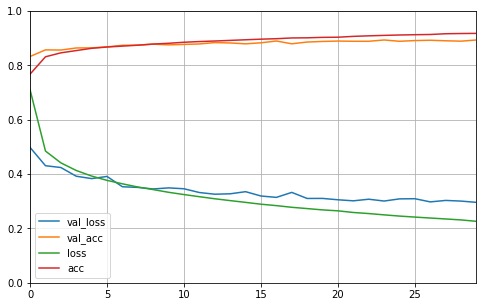

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [42]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 46us/step


[0.3299610888957977, 0.8832]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']